# Feature engineering

## Focus on time of various bids

In [1]:
# import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
bids = pd.read_csv('Data/bids.csv')
bidder = pd.read_csv('Data/train.csv')

In [3]:
print("BIDDER SHAPE: " + str(bidder.shape))
print("BIDS SHAPE: " + str(bids.shape))

BIDDER SHAPE: (2013, 4)
BIDS SHAPE: (7656334, 9)


In [4]:
print("#BIDDER in bidder dataset: " + str(bidder['bidder_id'].count()))
print("#BIDDER in bids dataset: " + str(bids['bidder_id'].nunique()))

#BIDDER in bidder dataset: 2013
#BIDDER in bids dataset: 6614


#### Make a deep copy of the datasets to check if after all pre-processing the datas still be significant

In [5]:
import copy
bids_copy = copy.deepcopy(bids)
bidder_copy = copy.deepcopy(bidder)

### Encoding
- 'pd.concat()' unisce le colonne bidder_id di bids e bidder.
- 'unique()' restituisce una lista di valori univoci di bidder_id presenti in entrambi i dataset, eliminando duplicati.
- 'enumerate(unique_bidders)' associa un indice numerico (da 0 in poi) a ciascun valore unico di bidder_id.
- Successivamente viene creata la nuova colonna 'encoded_bidder_id' e viene riempita con i valori corrispondenti nella mappa

In [6]:
unique_bidders = pd.concat([bids['bidder_id'], bidder['bidder_id']]).unique()
bidder_mapping = {bidder_id: idx for idx, bidder_id in enumerate(unique_bidders)}
bids['encoded_bidder_id'] = bids['bidder_id'].map(bidder_mapping)
bidder['encoded_bidder_id'] = bidder['bidder_id'].map(bidder_mapping)

### Encode and scale 'time'

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bids['time'] = scaler.fit_transform(bids[['time']])

#### Drop bidder_id, because 'encoded_bidder_id' feature was created

In [8]:
bids.drop('bidder_id',axis=1,inplace=True)
bidder.drop('bidder_id',axis=1,inplace=True)

In [9]:
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id
0,0,ewmzr,jewelry,phone0,0.903226,us,69.166.231.58,vasstdc27m7nks3,0
1,1,aeqok,furniture,phone1,0.903226,in,50.201.125.84,jmqlhflrzwuay9c,1
2,2,wa00e,home goods,phone2,0.903226,py,112.54.208.157,vasstdc27m7nks3,2
3,3,jefix,jewelry,phone4,0.903226,in,18.99.175.133,vasstdc27m7nks3,3
4,4,jefix,jewelry,phone5,0.903226,in,145.138.5.37,vasstdc27m7nks3,4
...,...,...,...,...,...,...,...,...,...
7656329,7656329,3e64w,jewelry,phone91,0.548387,ru,140.204.227.63,cghhmomsaxi6pug,2957
7656330,7656330,xn0y0,mobile,phone236,0.548387,pl,24.232.159.118,wgggpdg2gx5pesn,3380
7656331,7656331,gja6c,sporting goods,phone80,0.548387,za,80.237.28.246,5xgysg14grlersa,2955
7656332,7656332,hmwk8,jewelry,phone349,0.548387,my,91.162.27.152,bhtrek44bzi2wfl,3049


In [10]:
bidder

,payment_account,address,outcome,encoded_bidder_id
0,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1309
1,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,2397
2,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,2514
3,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,6527
4,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,238
...,...,...,...,...
2008,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,4823
2009,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,6495
2010,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2209
2011,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,5380


In [11]:
print("BIDDER SHAPE: " + str(bidder.shape) + " - " + str(bidder_copy.shape))
print("BIDS SHAPE: " + str(bids.shape) + " - " + str(bids_copy.shape))

BIDDER SHAPE: (2013, 4) - (2013, 4)
BIDS SHAPE: (7656334, 9) - (7656334, 9)


### Add the average number of bids a user placed per referring URL

In [12]:
# Label Encoding for url
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["url"] = encoder.fit_transform(bids['url'])

# From the bids dataset, group by bidder_id and url and count number of bids for every group
bids_per_url_train = bids.groupby(['encoded_bidder_id', 'url'])['bid_id'].count().reset_index(name='bid_count')

# Calculate the mean
average_bids_per_user_train = bids_per_url_train.groupby('encoded_bidder_id')['bid_count'].mean().reset_index(name='avg_bids_per_url')

In [13]:
average_bids_per_user_train

,encoded_bidder_id,avg_bids_per_url
0,0,3.712683
1,1,4.415286
2,2,7.891916
3,3,4.419524
4,4,7.236384
...,...,...
6609,6609,1.000000
6610,6610,1.000000
6611,6611,1.000000
6612,6612,1.000000


### Add the mean of the per-auction URL entropy
- Higher values of entropy suggest that the bidder's bidding behavior is spread across different auctions/URLs with a more uniform distribution.
- Lower values of entropy suggest that the bidder's activity is concentrated in specific auctions or URLs.

In [14]:
# Label Encoding for auction
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["auction"] = encoder.fit_transform(bids['auction'])

# Group by bidder_id and auction and count number of url for every group
bids_per_auction_url_train = bids.groupby(['encoded_bidder_id', 'auction'])['url'].count().reset_index(name='url_per_auction_count')

def calculate_entropy(values):
	total = sum(values)
	probabilities = [count / total for count in values]
	return -sum(p * np.log2(p) for p in probabilities if p > 0)

# Calculate entropy for each bidder per auction
bids_per_auction_url_entropy_train = (
	bids_per_auction_url_train.groupby(['encoded_bidder_id'])['url_per_auction_count']
	.apply(calculate_entropy)
	.reset_index(name='url_entropy_per_auction')
)

In [15]:
bids_per_auction_url_entropy_train

,encoded_bidder_id,url_entropy_per_auction
0,0,6.158347
1,1,5.696760
2,2,6.494542
3,3,2.407953
4,4,2.440489
...,...,...
6609,6609,-0.000000
6610,6610,-0.000000
6611,6611,-0.000000
6612,6612,-0.000000


### Add time_since_last_bid
Tempo trascorso dalla bid precedente nella stessa asta.

In [16]:
# Order bids by encoded_bidder_id, auction, and then by time
bids_ordered_by_time = bids.sort_values(by=['encoded_bidder_id', 'auction', 'time'])

# Calculate the difference between every bids in the same auction for each bidder
bids_ordered_by_time['time_since_last_bid'] = bids_ordered_by_time.groupby(['encoded_bidder_id', 'auction'])['time'].diff()

# First bid has Nan value, because it is the starting bid
bids_ordered_by_time['time_since_last_bid'] = bids_ordered_by_time['time_since_last_bid'].fillna(0)

# Maintain only the new column
bids_ordered_by_time = bids_ordered_by_time[['bid_id', 'time_since_last_bid']]

print("BIDS ORDERED BY TIME DATASET SHAPE: " + str(bids_ordered_by_time.shape))
bids_ordered_by_time

BIDS ORDERED BY TIME DATASET SHAPE: (7656334, 2)


,bid_id,time_since_last_bid
188711,188711,0.000000
524790,524790,0.017027
690113,690113,0.007625
906485,906485,0.006253
1297288,1297288,0.018804
...,...,...
7635939,7635939,0.000000
7637097,7637097,0.000000
7639758,7639758,0.000000
7651414,7651414,0.000000


### Time until auction end
- Calculate the time between the actual bid and the end of the auction (end of aucion = time of last bid of the auction)

In [17]:
# Group every bids by auction and take the max of the time as the end of the auction
auction_end_times = bids.groupby('auction')['time'].max().reset_index()
auction_end_times.rename(columns={'time': 'auction_end_time'}, inplace=True)
print("AUCTION END TIMES DATASET SHAPE: " + str(auction_end_times.shape))

# Merge on auction
bids_from_auction_end = bids.merge(auction_end_times, on='auction', how='left')
print("BIDS END TIMES DATASET SHAPE: " + str(bids_from_auction_end.shape))

# Calculate the distance from the last bid in the auction
bids_from_auction_end = bids_from_auction_end[['bid_id', 'auction_end_time', 'time']]
bids_from_auction_end['time_until_auction_end'] = bids_from_auction_end['auction_end_time'] - bids_from_auction_end['time']

# Drop 'auction_end_time' column
bids_from_auction_end = bids_from_auction_end.drop(['auction_end_time', 'time'], axis=1)

bids_from_auction_end

AUCTION END TIMES DATASET SHAPE: (15051, 2)
BIDS END TIMES DATASET SHAPE: (7656334, 10)


,bid_id,time_until_auction_end
0,0,0.096696
1,1,0.096772
2,2,0.096748
3,3,0.096774
4,4,0.096774
...,...,...
7656329,7656329,0.000000
7656330,7656330,0.000000
7656331,7656331,0.000000
7656332,7656332,0.000000


### Time entropy per auction
- Time entropy measures the unpredictability or randomness of bid placements within an auction
- A high entropy value suggests random or unpredictable bid timing (which might indicate a bot), while a low entropy means bids follow a pattern (which is more human-like).

In [18]:
# Compute time differences per auction
bids_sorted_by_time = bids.sort_values(by=['auction', 'time'])
bids_sorted_by_time['time_diff'] = bids_sorted_by_time.groupby('auction')['time'].diff().fillna(0)

# Compute time probability distribution per auction
def compute_entropy(time_diffs):
	if len(time_diffs) <= 1:
		return 0  # If there's only 1 bid, entropy is 0
	probs = time_diffs / time_diffs.sum()  # Normalize to get probabilities
	entropy = -np.sum(probs * np.log2(probs + 1e-9))  # Compute entropy (avoid log(0) error)
	return entropy

# Apply entropy function to each auction
auction_entropy = bids_sorted_by_time.groupby('auction')
auction_entropy = auction_entropy['time_diff'].apply(compute_entropy).reset_index()
auction_entropy.rename(columns={'time_diff': 'time_entropy'}, inplace=True)

# Merge entropy values back into the original bids dataset
bids_sorted_by_time = bids.merge(auction_entropy, on='auction', how='left')
print("BIDS SORTED BY TIME DATASET SHAPE: " + str(bids_sorted_by_time.shape))

bids_time_entropy = bids_sorted_by_time[['bid_id', 'time_entropy']]
bids_time_entropy

BIDS SORTED BY TIME DATASET SHAPE: (7656334, 10)


,bid_id,time_entropy
0,0,10.668364
1,1,12.499526
2,2,7.042982
3,3,16.773118
4,4,16.773118
...,...,...
7656329,7656329,5.390230
7656330,7656330,4.747517
7656331,7656331,5.610058
7656332,7656332,2.648737


### Bidding speed
- Difference of time between the bids of a same bidder inside an auction

In [19]:
# Sort by time within each bidder and auction
bids_sorted_per_time = bids.sort_values(by=['encoded_bidder_id', 'auction', 'time'])

# Compute bidding speed
bids_sorted_per_time['bidding_speed'] = bids_sorted_per_time.groupby(['encoded_bidder_id', 'auction'])['time'].diff().fillna(0)

# Print dataset shape
print("BIDS 'BIDDING SPEED' DATASET SHAPE: " + str(bids_sorted_per_time.shape))
bids_sorted_per_time = bids_sorted_per_time[['bid_id', 'bidding_speed']]
bids_sorted_per_time

BIDS 'BIDDING SPEED' DATASET SHAPE: (7656334, 10)


,bid_id,bidding_speed
188711,188711,0.000000
524790,524790,0.017027
690113,690113,0.007625
906485,906485,0.006253
1297288,1297288,0.018804
...,...,...
7635939,7635939,0.000000
7637097,7637097,0.000000
7639758,7639758,0.000000
7651414,7651414,0.000000


### Concurrent bids
- '1' if a bidder is placed at the same of another 
- '0' otherwise

In [20]:
print("UNIQUE VALUES OF TIME: " + str(bids['time'].nunique()))

concurrent_bids = bids.copy()

# Count how many bids have been made in the same time, respect to the auction
concurrent_bids['concurrent_bid'] = bids.groupby(['time', 'encoded_bidder_id'])['bid_id'].transform('count')

# if at least 2 cuncurrent bids, concurrent_bid = 1, else 0
concurrent_bids['concurrent_bid'] = (concurrent_bids['concurrent_bid'] > 1).astype(int)

concurrent_bids = concurrent_bids[['bid_id', 'concurrent_bid']]
concurrent_bids

UNIQUE VALUES OF TIME: 776529


,bid_id,concurrent_bid
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
7656329,7656329,0
7656330,7656330,0
7656331,7656331,0
7656332,7656332,0


### Winning bid in an auction
- if a bid is the last of an auction, is the winning one (1), else no (0)

In [21]:
winning_bids = bids.sort_values(by=['auction', 'time'])

# Take the last bid for every auction
max_times = winning_bids.groupby('auction')['time'].transform('max')

# If is the last 1, else 0
winning_bids['winning_bid'] = (winning_bids['time'] == max_times).astype(int)

winning_bids = winning_bids[['bid_id', 'winning_bid']]
winning_bids


,bid_id,winning_bid
5826422,5826422,0
5834284,5834284,0
5850448,5850448,0
5884054,5884054,0
5898318,5898318,0
...,...,...
7646305,7646305,0
7648070,7648070,0
7648153,7648153,0
7649363,7649363,0


### Percentile, quantile

In [22]:
# Calculate quantilies 
quantiles = bids.groupby('auction')['time'].quantile([0.5, 0.75]).unstack()
quantiles.columns = ['median_time', 'q3_time']

bids_quantilies = bids.merge(quantiles, on='auction', how='left')

# Creare le colonne di classificazione
bids_quantilies['first_half'] = (bids_quantilies['time'] <= bids_quantilies['median_time']).astype(int)
bids_quantilies['third_quantile'] = (bids_quantilies['time'] > bids_quantilies['q3_time']).astype(int)

# Create new dataset
bids_quantilies = bids_quantilies[['bid_id', 'first_half', 'third_quantile']]
bids_quantilies


,bid_id,first_half,third_quantile
0,0,1,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
...,...,...,...
7656329,7656329,0,1
7656330,7656330,0,1
7656331,7656331,0,1
7656332,7656332,0,1


## Join new features extracted with bids dataset

In [23]:
# from functools import reduce

# # List of DataFrames to merge
# dataframes_to_merge_train = [average_bids_per_user_train, bids_per_auction_url_entropy_train]

# # Merge all DataFrames on a common column
# for df_to_merge_train in dataframes_to_merge_train:
# 	bids = pd.merge(bids, df_to_merge_train, on='encoded_bidder_id', how='outer')

In [24]:
from functools import reduce

dfs = [bids_ordered_by_time, bids_from_auction_end, bids_time_entropy, bids_sorted_per_time, concurrent_bids, winning_bids, bids_quantilies]

for df_to_merge in dfs:
	bids = bids.merge(df_to_merge, on='bid_id', how='inner')
	
bids

,bid_id,auction,merchandise,device,time,country,ip,url,encoded_bidder_id,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,0,6242,jewelry,phone0,0.903226,us,69.166.231.58,1553590,0,0.000000e+00,0.096696,10.668364,0.000000e+00,0,0,1,0
1,1,4307,furniture,phone1,0.903226,in,50.201.125.84,974753,1,0.000000e+00,0.096772,12.499526,0.000000e+00,0,0,1,0
2,2,13537,home goods,phone2,0.903226,py,112.54.208.157,1553590,2,0.000000e+00,0.096748,7.042982,0.000000e+00,0,0,1,0
3,3,8203,jewelry,phone4,0.903226,in,18.99.175.133,1553590,3,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
4,4,8203,jewelry,phone5,0.903226,in,145.138.5.37,1553590,4,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,7656329,1353,jewelry,phone91,0.548387,ru,140.204.227.63,618333,2957,1.392623e-04,0.000000,5.390230,1.392623e-04,0,1,0,1
7656330,7656330,14084,mobile,phone236,0.548387,pl,24.232.159.118,1610649,3380,5.600361e-05,0.000000,4.747517,5.600361e-05,0,1,0,1
7656331,7656331,6992,sporting goods,phone80,0.548387,za,80.237.28.246,294671,2955,3.733574e-07,0.000000,5.610058,3.733574e-07,0,1,0,1
7656332,7656332,7478,jewelry,phone349,0.548387,my,91.162.27.152,570553,3049,1.205944e-04,0.000000,2.648737,1.205944e-04,0,1,0,1


### Check of consinstance

In [25]:
print("BIDDER SHAPE: " + str(bidder.shape) + " - " + str(bidder_copy.shape))
print("BIDS SHAPE: " + str(bids.shape) + " - " + str(bids_copy.shape))

print("#BIDDER in bidder dataset: " + str(bidder['encoded_bidder_id'].count()))
print("#BIDDER in bids dataset: " + str(bids['encoded_bidder_id'].nunique()))

BIDDER SHAPE: (2013, 4) - (2013, 4)
BIDS SHAPE: (7656334, 17) - (7656334, 9)
#BIDDER in bidder dataset: 2013
#BIDDER in bids dataset: 6614


## Training and test with new features

### First:
- encode features

In [26]:
# bids.drop(["bid_id", "time", "merchandise", "country", "ip", "device", "url", "auction"], axis=1, inplace=True)
bids.drop(["bid_id", "time"], axis=1, inplace=True)

# Encoding 'merchandise'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bids["merchandise"] = encoder.fit_transform(bids['merchandise'])
bids["country"] = encoder.fit_transform(bids['country'])
bids["ip"] = encoder.fit_transform(bids['ip'])
bids["device"] = encoder.fit_transform(bids['device'])

bids


,auction,merchandise,device,country,ip,url,encoded_bidder_id,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,6242,6,0,186,2000621,1553590,0,0.000000e+00,0.096696,10.668364,0.000000e+00,0,0,1,0
1,4307,4,1,84,1821800,974753,1,0.000000e+00,0.096772,12.499526,0.000000e+00,0,0,1,0
2,13537,5,1111,149,151287,1553590,2,0.000000e+00,0.096748,7.042982,0.000000e+00,0,0,1,0
3,8203,6,3323,84,818918,1553590,3,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
4,8203,6,4419,84,469722,1553590,4,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,1353,6,7252,154,427210,618333,2957,1.392623e-04,0.000000,5.390230,1.392623e-04,0,1,0,1
7656330,14084,7,1512,145,1417972,1610649,3380,5.600361e-05,0.000000,4.747517,5.600361e-05,0,1,0,1
7656331,6992,9,7130,195,2120306,294671,2955,3.733574e-07,0.000000,5.610058,3.733574e-07,0,1,0,1
7656332,7478,6,2763,127,2225358,570553,3049,1.205944e-04,0.000000,2.648737,1.205944e-04,0,1,0,1


### Check if there are any Nan in 'bids'

In [27]:
bids.dropna(inplace = True)
bids

,auction,merchandise,device,country,ip,url,encoded_bidder_id,time_since_last_bid,time_until_auction_end,time_entropy,bidding_speed,concurrent_bid,winning_bid,first_half,third_quantile
0,6242,6,0,186,2000621,1553590,0,0.000000e+00,0.096696,10.668364,0.000000e+00,0,0,1,0
1,4307,4,1,84,1821800,974753,1,0.000000e+00,0.096772,12.499526,0.000000e+00,0,0,1,0
2,13537,5,1111,149,151287,1553590,2,0.000000e+00,0.096748,7.042982,0.000000e+00,0,0,1,0
3,8203,6,3323,84,818918,1553590,3,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
4,8203,6,4419,84,469722,1553590,4,0.000000e+00,0.096774,16.773118,0.000000e+00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656329,1353,6,7252,154,427210,618333,2957,1.392623e-04,0.000000,5.390230,1.392623e-04,0,1,0,1
7656330,14084,7,1512,145,1417972,1610649,3380,5.600361e-05,0.000000,4.747517,5.600361e-05,0,1,0,1
7656331,6992,9,7130,195,2120306,294671,2955,3.733574e-07,0.000000,5.610058,3.733574e-07,0,1,0,1
7656332,7478,6,2763,127,2225358,570553,3049,1.205944e-04,0.000000,2.648737,1.205944e-04,0,1,0,1


### Then:
- split dataset

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Convert 'outcome' in type int
bidder['outcome'] = bidder['outcome'].astype(int)

# First split data in the bidder csv, to avoid to separate bidder splitting on the bids
X_bidder = bidder.drop(['outcome', 'address', 'payment_account'],axis=1)
y_bidder = bidder['outcome']

X_train_bidder, X_val_bidder, y_train_bidder, y_val_bidder = train_test_split(X_bidder, y_bidder, test_size=0.3, random_state=42, stratify=y_bidder)

df_train = pd.merge(bids, pd.concat([X_train_bidder, y_train_bidder], axis=1), on='encoded_bidder_id', how='inner')
df_val = pd.merge(bids, pd.concat([X_val_bidder, y_val_bidder], axis=1), on='encoded_bidder_id', how='inner')

# if i put 'left' on the merge my total lenght of (train + val) / 2 should return the same value of the original 'bids' length --> ho controllato ed è cosi
print("Controll correctness: ")
print("'Bids' length before split: " + str(bids.shape[0]))
print("'Bids' length after split: " + str(df_train.shape[0] + df_val.shape[0]))


Controll correctness: 
'Bids' length before split: 7656334
'Bids' length after split: 3071224


### Controll correctness
- 'Bids' length before split: 7656334
- 'Bids' length after split: 3071224

That means that some bidders do not have bids.

### Check for null

In [29]:
# Check for null
for column_train, column_val in zip(df_train.columns, df_val.columns):
	if df_train[column_train].isnull().sum() > 0:
		print("!NULL!" + str(column_train) + " - Train")
	if df_val[column_val].isnull().sum() > 0:
		print("!NULL!" + str(column_val) + " - Val")

### Print datasets

In [30]:
print("TRAIN DATASET: ")
print(df_train.head(10))
print("\n---------\n")
print("VALIDATION DATASET: ")
print(df_val.head(10))

TRAIN DATASET: 
   auction  merchandise  device  country       ip      url  encoded_bidder_id  \
0     4307            4       1       84  1821800   974753                  1   
1     1293            4    3323       15   493719  1553590                  1   
2     4307            4    2774       84  2061457   906375                  1   
3     8253            4    3104       84  1174792  1395868                  1   
4     7225            4    5170       84   363281    70211                  1   
5     4307            4    5170       81  2091086  1216848                  1   
6     7225            4    7285       84   864139   230943                  1   
7      511            4    3323       84  2190265  1553590                  1   
8     9036            4    2219       25  1298775  1553590                  1   
9     1293            4    3874       84   802531  1666401                  1   

   time_since_last_bid  time_until_auction_end  time_entropy  bidding_speed  \
0            

### Drop 'encoded_bidder_id'

In [31]:
# First save 'encoded_bidder_id' column
df_train_copy = df_train[['encoded_bidder_id']]
df_val_copy = df_val[['encoded_bidder_id']]

df_train.drop(['encoded_bidder_id'],axis=1, inplace=True)
df_val.drop(['encoded_bidder_id'],axis=1, inplace=True)

## Start test

### Split

In [32]:
X_train = df_train.drop(['outcome'],axis=1)
y_train = df_train['outcome']
X_val = df_val.drop(['outcome'],axis=1)
y_val = df_val['outcome']

print(X_train.head(10))
print(X_val.head(10))

   auction  merchandise  device  country       ip      url  \
0     4307            4       1       84  1821800   974753   
1     1293            4    3323       15   493719  1553590   
2     4307            4    2774       84  2061457   906375   
3     8253            4    3104       84  1174792  1395868   
4     7225            4    5170       84   363281    70211   
5     4307            4    5170       81  2091086  1216848   
6     7225            4    7285       84   864139   230943   
7      511            4    3323       84  2190265  1553590   
8     9036            4    2219       25  1298775  1553590   
9     1293            4    3874       84   802531  1666401   

   time_since_last_bid  time_until_auction_end  time_entropy  bidding_speed  \
0             0.000000                0.096772     12.499526       0.000000   
1             0.000000                0.096770     12.240200       0.000000   
2             0.000001                0.096771     12.499526       0.000001   
3

### Train and validation

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [34]:
# df_results = pd.DataFrame({
# 	'encoded_bidder_id': X_val['encoded_bidder_id'],
# 	'predicted_outcome': y_pred
# })

# df_results

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    820405
           1       0.18      0.19      0.19     53159

    accuracy                           0.90    873564
   macro avg       0.56      0.57      0.57    873564
weighted avg       0.90      0.90      0.90    873564



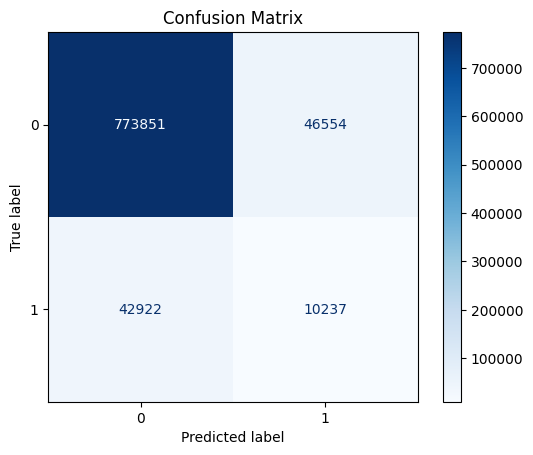

In [35]:
cr_new_features = classification_report(y_val, y_pred)
print("Classification Report:")
print(cr_new_features)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_val, y_pred)
cm_dt_with_new_features = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
cm_dt_with_new_features.plot(cmap="Blues", values_format='d')

import os
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = f"Outputs/output_{timestamp}"
os.makedirs(output_dir, exist_ok=True)
image_path = os.path.join(output_dir, 'Confusion Matrix.png')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.savefig(image_path, dpi=300, bbox_inches='tight')

class_report_path = os.path.join(output_dir, 'Classification_report.txt')
with open(class_report_path, 'w') as f:
	f.write(cr_new_features)

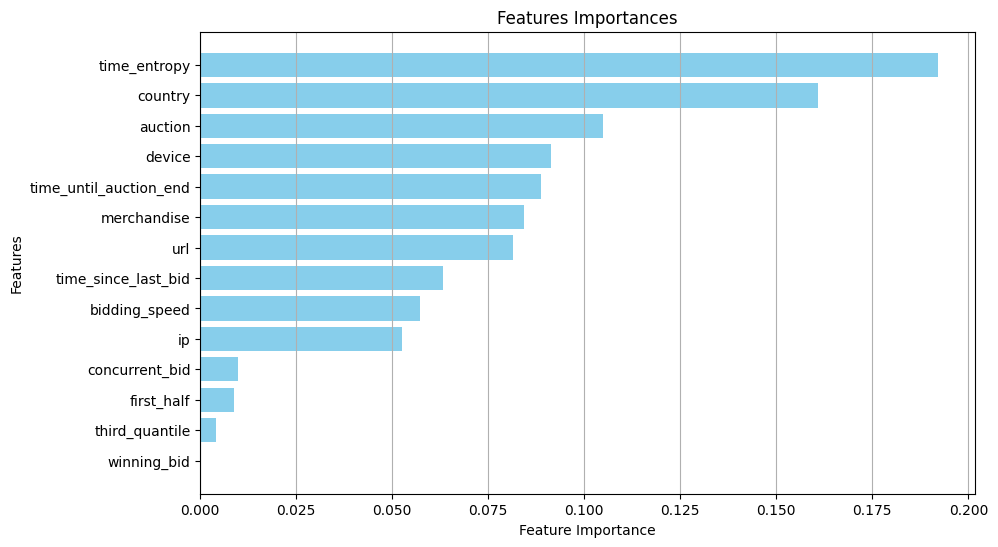

In [36]:
import numpy as np

# Ottieni le importanze delle feature
feature_importances = model.feature_importances_

# Ordina le feature per importanza decrescente
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in DecisionTreeClassifier")
plt.gca().invert_yaxis()  # Inverti l'asse Y per avere la feature più importante in alto
plt.grid(axis='x')

fea_importance_path = os.path.join(output_dir, 'Feature_importances.png')
plt.title('Features Importances')
plt.savefig(fea_importance_path, dpi=300, bbox_inches='tight')

In [37]:
# from fep import FEP, load_features
# pipeline = FEP("prova.csv")
# pipeline.save_features(df_train)